In [3]:
import os, pathlib

In [4]:
rootDataPath = pathlib.Path('./croped_data/')

In [5]:
flowerClass = os.listdir(rootDataPath)
print(flowerClass, '\n', len(flowerClass))

['.DS_Store', 'Babi', 'Pingpong', 'Chrysanthemum', 'Rosy', 'Tana', 'Hydrangeas', 'Lisianthus', 'Calimerio'] 
 9


In [9]:
#Go through the sub-directories and list the numbers of files
for dirpath, dirnames, filenames in os.walk(rootDataPath):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 8 directories and 1 images in croped_data
There are 0 directories and 1122 images in croped_data/Babi
There are 0 directories and 393 images in croped_data/Pingpong
There are 0 directories and 767 images in croped_data/Chrysanthemum
There are 0 directories and 198 images in croped_data/Rosy
There are 0 directories and 662 images in croped_data/Tana
There are 0 directories and 602 images in croped_data/Hydrangeas
There are 0 directories and 1028 images in croped_data/Lisianthus
There are 0 directories and 403 images in croped_data/Calimerio


In [10]:
babi = [str(path) for path in list(rootDataPath.glob('Babi/*'))]
calimerio = [str(path) for path in list(rootDataPath.glob('Calimerio/*'))]
chrysanthemum = [str(path) for path in list(rootDataPath.glob('Chrysanthemum/*'))]
rosy = [str(path) for path in list(rootDataPath.glob('Rosy/*'))]
tana = [str(path) for path in list(rootDataPath.glob('Tana/*'))]
pingpong = [str(path) for path in list(rootDataPath.glob('Pingpong/*'))]
hydrangeas = [str(path) for path in list(rootDataPath.glob('Hydrangeas/*'))]
lisianthus = [str(path) for path in list(rootDataPath.glob('Lisianthus/*'))]

In [6]:
import tensorflow

2023-05-13 16:03:25.470781: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd
import cv2
from tqdm.auto import tqdm
import os
from matplotlib import pyplot as plt


In [42]:
input_test1 = [str(path) for path in list(pathlib.Path('./input_test1/').glob('*'))]

In [43]:
len(input_test1)

46

In [12]:
def return_image_embedding(model,img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    preds = model.predict(x)
    
    curr_df = pd.DataFrame(preds[0]).T
    return curr_df

model = ResNet50(include_top=False, weights='imagenet', pooling='avg')

94765736/94765736 [==============================] - 13s 0us/step


In [14]:
img_path = './test_data/babi_1.jpg'
return_image_embedding(model,img_path)

1/1 [==============================] - 1s 1s/step


,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,1.015241,0.676534,0.476762,1.944255,0.130306,0.559049,0.199601,0.22333,0.596701,0.814722,...,1.143151,0.008049,0.230695,0.109246,0.541069,0.120974,0.838504,0.34354,0.367259,1.85796


In [17]:
# , calimerio, chrysanthemum, rosy, tana, pingpong, hydrangeas, lisianthus
folders = [babi]

In [18]:
embedding_df = pd.DataFrame()

for folder in folders:
    for curr_img in folder:
        curr_df = return_image_embedding(model,img_path)
        curr_df['image'] = curr_img
        embedding_df = pd.concat([embedding_df,curr_df],ignore_index=True)

1/1 [==============================] - 0s 162ms/step


In [44]:
embedding_df2 = pd.DataFrame()

for curr_img in input_test1:
        curr_df = return_image_embedding(model,img_path)
        curr_df['image'] = curr_img
        embedding_df2 = pd.concat([embedding_df2,curr_df],ignore_index=True)

1/1 [==============================] - 0s 112ms/step


In [37]:
embedding_df['image'][0]

'croped_data/Babi/babi_926.jpg'

In [19]:
from sklearn.metrics.pairwise import cosine_distances,pairwise_distances,cosine_similarity
cosine_similarity_df = pd.DataFrame(cosine_similarity(embedding_df.drop('image',axis=1)))

In [32]:
cosine_similarity_df.head

<bound method NDFrame.head of       0     1     2     3     4     5     6     7     8     9     ...  1112  \
0      1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  ...   1.0   
1      1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  ...   1.0   
2      1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  ...   1.0   
3      1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  ...   1.0   
4      1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  ...   1.0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
1117   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  ...   1.0   
1118   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  ...   1.0   
1119   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  ...   1.0   
1120   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  ...   1.0   
1121   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  ...   1.0   

      1113  1114  111

In [45]:
cosine_similarity_df2 = pd.DataFrame(cosine_similarity(embedding_df2.drop('image',axis=1)))

In [46]:
cosine_similarity_df2.head()

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [27]:
def show_img(image_name,title):
    img_path = str(image_name)
    im = cv2.imread(img_path)
    im = cv2.resize(im, (960, 540))
    plt.axis('off')
    plt.imshow(im[:,:,::-1])
    plt.title(title)
    plt.show()

In [35]:
def fetch_most_similar_products(image_name,n_similar=7):
    print("-----------------------------------------------------------------------")
    print("Original Product:")
    show_img(image_name,image_name)
    curr_index = embedding_df[embedding_df['image']==image_name].index[0]
    closest_image = pd.DataFrame(cosine_similarity_df.iloc[curr_index].nlargest(n_similar+1)[1:])
    
    print("-----------------------------------------------------------------------")
    print("Recommended Product")
    for index,imgs in closest_image.iterrows():
        similar_image_name = embedding_df.iloc[index]['image']
        similarity = np.round(imgs.iloc[0],3)
        show_img(similar_image_name,str(similar_image_name)+'\nSimilarity : '+str(similarity))



-----------------------------------------------------------------------
Original Product:


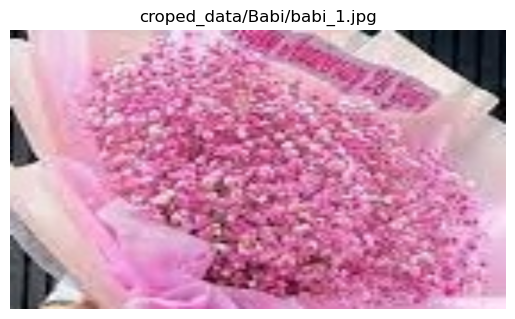

-----------------------------------------------------------------------
Recommended Product


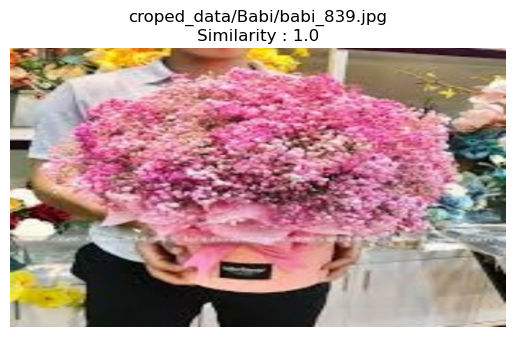

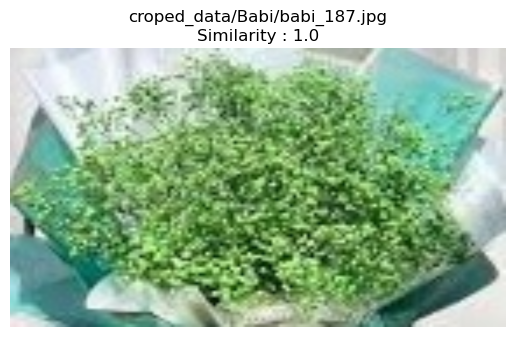

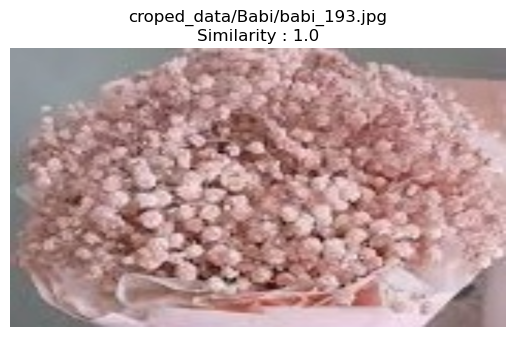

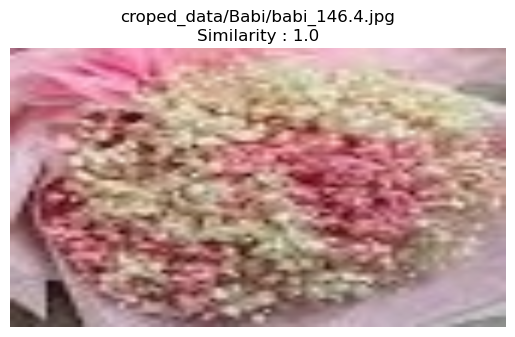

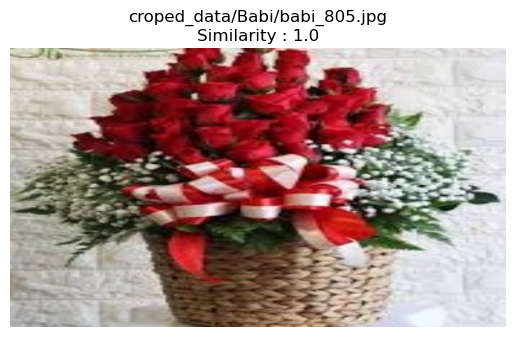

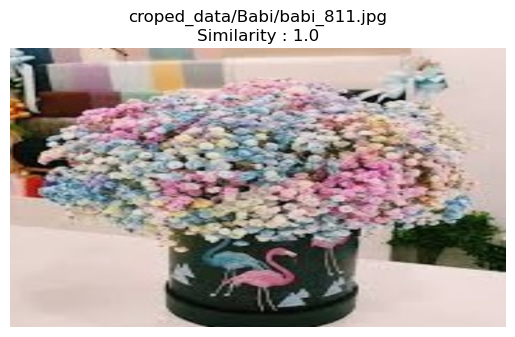

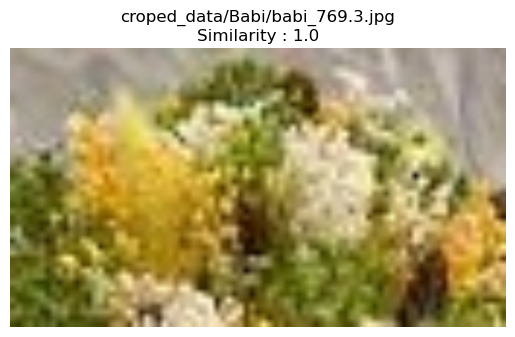

In [38]:
image_name = 'croped_data/Babi/babi_1.jpg'
fetch_most_similar_products(image_name)